# TUGAS BIG DATA 
Recency, Frequency, Monetary (RFM)
NIM : 1182002002
Nama : Febby Novanti Azhara

Sumber code : https://www.datacamp.com/community/tutorials/introduction-customer-segmentation-python
Sumber data : https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx

# Import Library

In [1]:
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt

# Import Dataset

In [3]:
data = pd.read_excel("Online Retail 2009.xlsx")
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
data.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [7]:
data= data[pd.notnull(data['Customer ID'])]

# Cleaning Data

In [8]:
filtered_data=data[['Country','Customer ID']].drop_duplicates()

# Data Insight

<AxesSubplot:>

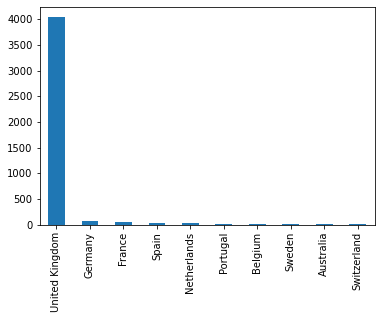

In [35]:
# 10 negara terbaik
filtered_data.Country.value_counts()[:10].plot(kind='bar') 

In [36]:
uk_data=data[data.Country=='United Kingdom']

In [37]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379423 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      379423 non-null  object        
 1   StockCode    379423 non-null  object        
 2   Description  379423 non-null  object        
 3   Quantity     379423 non-null  int64         
 4   InvoiceDate  379423 non-null  datetime64[ns]
 5   Price        379423 non-null  float64       
 6   Customer ID  379423 non-null  float64       
 7   Country      379423 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.1+ MB


In [38]:
uk_data.describe()

,Quantity,Price,Customer ID
count,379423.000000,379423.000000,379423.000000
mean,11.451517,3.653249,15559.935694
std,68.943709,68.743746,1593.744626
min,-9360.000000,0.000000,12346.000000
25%,2.000000,1.250000,14210.000000
50%,4.000000,1.950000,15581.000000
75%,12.000000,3.750000,16938.000000
max,10000.000000,25111.090000,18287.000000


In [39]:
uk_data = uk_data[(uk_data['Quantity']>0)]
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370951 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      370951 non-null  object        
 1   StockCode    370951 non-null  object        
 2   Description  370951 non-null  object        
 3   Quantity     370951 non-null  int64         
 4   InvoiceDate  370951 non-null  datetime64[ns]
 5   Price        370951 non-null  float64       
 6   Customer ID  370951 non-null  float64       
 7   Country      370951 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 25.5+ MB


# Filter kolom

In [42]:
uk_data=uk_data[['Customer ID','InvoiceDate','Invoice','Quantity','Price']]
uk_data['Total Price'] = uk_data['Quantity'] * uk_data['Price']
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

(Timestamp('2009-12-01 07:45:00'), Timestamp('2010-12-09 20:01:00'))

In [44]:
 PRESENT = dt.datetime(2011,12,10)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])
uk_data.head()

,Customer ID,InvoiceDate,Invoice,Quantity,Price,Total Price
0,13085.0,2009-12-01 07:45:00,489434,12,83.4,1000.8
1,13085.0,2009-12-01 07:45:00,489434,12,81.0,972.0
2,13085.0,2009-12-01 07:45:00,489434,12,81.0,972.0
3,13085.0,2009-12-01 07:45:00,489434,48,100.8,4838.4
4,13085.0,2009-12-01 07:45:00,489434,24,30.0,720.0


# RFM Analisis

In [48]:
rfm= uk_data.groupby('Customer ID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'Invoice': lambda num: len(num),
                                        'Total Price': lambda price: price.sum()})
rfm.columns

Index(['InvoiceDate', 'Invoice', 'Total Price'], dtype='object')

In [49]:
# Change the name of columns
rfm.columns=['monetary','frequency','recency']

In [51]:
rfm['recency'] = rfm['recency'].astype(int)
rfm.head()

,monetary,frequency,recency
Customer ID,,,
12346.0,529,33,1407
12608.0,404,16,22312
12745.0,486,22,19301
12746.0,540,17,1479
12747.0,369,154,88426


# Komputasi Kuartil nilai RFM

In [53]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])
rfm.head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile
Customer ID,,,,,,
12346.0,529,33,1407,1,3,1
12608.0,404,16,22312,3,4,3
12745.0,486,22,19301,3,3,2
12746.0,540,17,1479,1,4,1
12747.0,369,154,88426,4,1,4


# Interpretasi Hasil RFM

In [54]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score
Customer ID,,,,,,,
12346.0,529,33,1407,1,3,1,131
12608.0,404,16,22312,3,4,3,343
12745.0,486,22,19301,3,3,2,332
12746.0,540,17,1479,1,4,1,141
12747.0,369,154,88426,4,1,4,414


In [55]:
# Filter out Top/Best customers
rfm[rfm['RFM_Score']=='111'].sort_values('monetary', ascending=False).head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score
Customer ID,,,,,,,
15917.0,606,143,890,1,1,1,111
14556.0,596,203,1973,1,1,1,111
16922.0,572,122,1691,1,1,1,111
13432.0,571,111,1324,1,1,1,111
16798.0,554,173,1312,1,1,1,111
